<a href="https://colab.research.google.com/github/Nancy-Shi/Complex_Networks/blob/main/071023_Rumor_Model_Hyperedge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import math as math
from math import log
import seaborn as sns
import pandas as pd

In [ ]:
#!pip install xgi
import xgi

## Part 1: Hypergraph Generation
The following steps generate a hyper graph using the XGI/HyperNetX python package,  following power-law degree distribution for predifined number of nodes n, number of hyperedges num_hyper_edges, degree exponent gamma, using a configuration model with data stored in a dictionary.

In [ ]:
# Step 1: Generate Degree Sequence
def generate_degree_sequence(n, gamma, kmin):
    # Generate a random set from the power law distribution
    u = np.random.uniform(size=n)
    degrees = np.ceil((1.0 - u) ** (-1.0 / (gamma - 1.0)))

    # Adjust degrees based on the minimum and maximum degree values
    kmax = int(np.sqrt(n))
    # kmax = int(1.5*n**(1/4)) # max degree allowed is 1.5*n^(1/4)
    degrees = degrees[(degrees >= kmin) & (degrees <= kmax)].astype(int)

    # Truncate or pad the sequence to match the length specified
    if len(degrees) >= n:
        degrees = degrees[:n]
    else:
        degrees = np.concatenate((degrees, np.full(n - len(degrees), kmin)))

    return degrees.tolist()

# Step 2: Generate Hyper Edge Size Sequence
def generate_hyper_edge_sizes(degrees, num_hyper_edges):
    total_degrees = sum(degrees)
    hyper_edge_sizes = []

    # Calculate the average size for each hyper edge
    avg_size = total_degrees // num_hyper_edges
    remainder = total_degrees % num_hyper_edges

    # Define the range for the random distribution
    min_size = 1  # Lower bound of the range
    max_size = len(degrees)-num_hyper_edges  # Upper bound of the range

    # Generate hyper edge sizes
    for _ in range(num_hyper_edges):
        size = random.randint(min_size, max_size)
        hyper_edge_sizes.append(size)

    return hyper_edge_sizes


# Step 3: Create Copies of Nodes
def create_node_copies(degrees):
    node_copies = []
    for i, degree in enumerate(degrees):
        for _ in range(degree):
            node_copies.append(i)
    return node_copies

# Step 4: Create Copies of Hyper Edges
def create_hyper_edge_copies(hyper_edge_sizes):
    hyper_edge_copies = []
    for i, size in enumerate(hyper_edge_sizes):
        for _ in range(size):
            hyper_edge_copies.append(i)
    return hyper_edge_copies

# Step 5: Randomly Pair Copies
def randomly_pair_copies(node_copies, hyper_edge_copies):
    random.shuffle(node_copies)
    random.shuffle(hyper_edge_copies)
    pairs = []
    for i in range(len(node_copies)):
        pairs.append((node_copies[i], hyper_edge_copies[i]))
    return pairs

# Step 6: Convert Bipartite Graph to A Hypergraph Dictionary
def convert_to_hypergraph(pairs):
    hypergraph = {}
    for pair in pairs:
        node, hyper_edge = pair
        if hyper_edge in hypergraph:
            hypergraph[hyper_edge].append(node)
        else:
            hypergraph[hyper_edge] = [node]
    return hypergraph


In [ ]:
def build_hypergraph(n, gamma, kmin, num_hyper_edges):
    # Step 1: Generate Degree Sequence
    degrees = generate_degree_sequence(n, gamma, kmin)
    print("Degree Sequence: ", degrees)

    # Step 2: Generate Hyper Edge Size Sequence
    hyper_edge_sizes = generate_hyper_edge_sizes(degrees, num_hyper_edges)
    print("Hyper Edge Sizes: ", hyper_edge_sizes)

    # Step 3: Create Copies of Nodes
    node_copies = create_node_copies(degrees)

    # Step 4: Create Copies of Hyper Edges
    hyper_edge_copies = create_hyper_edge_copies(hyper_edge_sizes)

    # Step 5: Randomly Pair Copies
    pairs = randomly_pair_copies(node_copies, hyper_edge_copies)

    # Step 6: Convert Bipartite Graph to Hypergraph
    hyperedge_dict = convert_to_hypergraph(pairs)

    # Print the resulting hypergraph
    print("Hypergraph Dictionary: ", hyperedge_dict)

    return degrees, hyperedge_dict


In [305]:
# Test 1
n =50  # Number of nodes
gamma = 2.5  # Power-law exponent
kmin = 3  # Minimum degree
num_hyper_edges = 8  # Desired number of hyper edges

degrees, hyperedge_dict = build_hypergraph(n, gamma, kmin, num_hyper_edges)

Degree Sequence:  [3, 4, 3, 3, 3, 3, 7, 4, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Hyper Edge Sizes:  [17, 34, 29, 6, 25, 8, 30, 38]
Hypergraph Dictionary:  {0: [13, 43, 40, 44, 42, 10, 35, 11, 41, 40, 28, 33, 19], 4: [8, 25, 22, 23, 36, 8, 28, 15, 13, 17, 47, 23, 48, 40, 7, 25, 3, 39, 4, 42, 49, 48, 29], 6: [6, 31, 27, 3, 2, 21, 31, 37, 42, 38, 41, 39, 28, 15, 46, 18, 39, 30, 29, 49, 34, 16, 6, 13], 1: [45, 20, 13, 44, 24, 36, 32, 20, 5, 29, 30, 9, 35, 34, 32, 4, 45, 22, 14, 10, 34, 46, 15, 7, 41, 47], 7: [5, 36, 24, 24, 11, 10, 6, 26, 9, 33, 17, 7, 13, 25, 17, 38, 22, 43, 18, 16, 6, 19, 6, 5, 12, 19, 37, 6, 4, 27, 14, 12, 1, 21], 2: [38, 0, 1, 23, 12, 47, 3, 11, 37, 26, 0, 21, 27, 9, 2, 35, 13, 30, 49, 16, 14, 26, 48, 7, 43, 8], 3: [1, 44, 31, 0, 1, 46], 5: [45, 18, 20, 6, 33, 32, 2]}


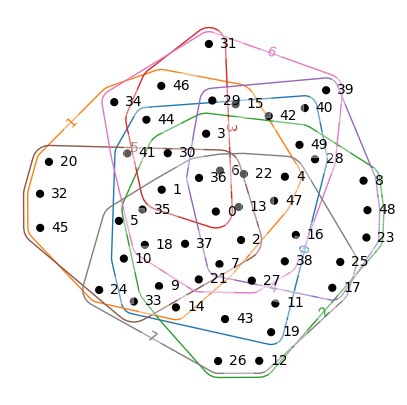

In [306]:
# Plot the hypergraph
import hypernetx as hnx
H = hnx.Hypergraph(hyperedge_dict)
plt.subplots(figsize=(5,5))
hnx.draw(H)

In [307]:
# alternative way to draw the hypergraph
# H2 = xgi.Hypergraph(hyperedge_dict)
# pos = xgi.barycenter_spring_layout(H2)
# xgi.draw(H, pos, node_labels=True, font_color_nodes="gray")

## Part 2: Assign Threshold
The following steps assigns a threshold value to each node in the network. The threshold follows a uniform or normal distribution with predefined mean (mu) and standard deviation (sigma).

In [308]:
import numpy as np
import random

# Defines the parameters to be used
mu = 0.2
sigma = 0.5

# Function to assign thresholds to the individual nodes
def assign_thresholds(hypergraph):
    NV = hypergraph.order()
    Ltre = {}

    for node in hypergraph.nodes():
          # Uniform distribution: #
          Ltre[node] = np.random.uniform(0, 0.1)
          # Normal distrution
          #while True:
          #    threshold = random.gauss(mu, sigma)
          #    if 0 < threshold < 1:
          #        break
          #Ltre[node] = threshold

    return Ltre

Ltre = assign_thresholds(H)

print("Threshold List for Nodes: ", Ltre )

Threshold List for Nodes:  {0: 0.09034685785666764, 1: 0.07146552601415303, 2: 0.014565831614901726, 3: 0.06546213202171247, 4: 0.007254961006448258, 5: 0.05608239063281978, 6: 0.017830278264341803, 7: 0.05350436095031955, 8: 0.021803548344927627, 9: 0.05138700682228962, 10: 0.06252175644271514, 11: 0.037349447821673924, 12: 0.06681268458280885, 13: 0.06702178473539085, 14: 0.07213577080306148, 15: 0.06480030481180542, 16: 0.0961040031160072, 17: 0.08401521530581935, 18: 0.0440734003427422, 19: 0.004696251519734707, 20: 0.04944039915276519, 21: 0.05432614079407443, 22: 0.09654967377015186, 23: 0.07030504457169143, 24: 0.07067832342880599, 25: 0.0551689095740121, 26: 0.04869759731094762, 27: 0.07068287144066433, 28: 0.008830859597556672, 29: 0.062359798806472036, 30: 0.0011317608775149313, 31: 0.06421488016771268, 32: 0.009435166968274667, 33: 0.02381774072483872, 34: 0.04158166740098417, 35: 0.07041063318972875, 36: 0.026007749183229168, 37: 0.010167398446744837, 38: 0.0323083875845371

## Part 3: Rumor Spreading on Hypergraph
The follow steps extends the basic rumor spreading model to a hypergraph. An infection or recovery event can only happen if its infected or recovered neighbors reach a pre-assigned threshold.  

In [311]:
def rumor_hyperedge(nw, ldeg, ltre, lam, alp, n_samp):
    t_max = 100
    N = nw.order()
    kmax = max(ldeg)

    t_end = 0
    stifler_fractions = []

    for i_samp in range(1, n_samp+1):
        t = 0
        N_rec = 0

        states = {j: 0 for j in nw.nodes()}

        inf = []
        rec = []
        initial_node = np.random.choice(list(nw.nodes()))
        states[initial_node] = 1
        inf.append(initial_node)
        N_inf = 1
        N_e = nw.degree(initial_node)

        while N_inf != 0:
            total_rate = lam * N_e + 2 * alp * N_e
            tau = -np.log(np.random.uniform(1e-6, 1)) / total_rate
            t += tau

            if t >= t_max:
                break

            print("Current time:", t)
            print("Infected nodes:", inf)
            print("Recovered nodes:", rec)
            print("N_inf:", N_inf)
            print("N_e:", N_e)

            # Determine which event occurs
            event = np.random.uniform()
            p1 = lam / (lam + 2 * alp)
            #p2 = (lam + alp )/ (lam + 2 * alp)

            # Determine if accept selected spreader based on degree distribution
            q_deg = np.random.uniform()



            # Infection:
            if event <= p1:
                    print("Infection event")
                # Select a spreader individual to spread the rumor
                    inf_node = random.choice(inf)
                    #if q_deg < ldeg[inf_node] / kmax:
                    # Select a random hyper edge containing the infected node
                    infected_hyper_edge = np.random.choice(list(nw.edges()))
                    neighbors = nw.nodes[infected_hyper_edge]
                    while inf_node not in neighbors:
                        infected_hyper_edge = np.random.choice(list(nw.edges()))
                        neighbors = nw.nodes[infected_hyper_edge]

                    # Check if any neighbor meets the infection threshold
                    #is_infection = False
                    for neighbor in neighbors:
                        # Check if the selected neighbor is ignorant
                        if states[neighbor] == 0:
                            states[neighbor] = 1  # ignorant neighbor becomes spreader
                            inf.append(neighbor)
                            N_inf += 1
                            """
                            # Check the threshold
                                count_inf_neighbors = sum(states[node] == 1 for node in nw.neighbors(neighbor))
                                if count_inf_neighbors / len(nw.neighbors(neighbor)) >= ltre[neighbor]:
                            """


            else:  # Recovery
                print("Recovery event")
                # Select a spreader individual to recover
                rec_node = np.random.choice(inf)
                # Select a random hyperedge containing the recovered node
                recovered_hyper_edge = np.random.choice(list(nw.edges()))
                neighbors = nw.nodes[recovered_hyper_edge]

                count_rec_neighbors = sum(states[node] == 2 or states[node] == 1 for node in neighbors)
                if count_rec_neighbors > 0:
                #if len(neighbors) > 0 and count_rec_neighbors / len(neighbors) >= ltre[rec_node]:
                    # Update spreader to stifler if the selected neighbor is a stifler or spreader
                    states[rec_node] = 2
                    N_inf -= 1
                    inf.remove(rec_node)
                    rec.append(rec_node)
                    N_rec += 1

                    """
                    else:
                        for neighbor in neighbors:
                        # Check the threshold of infected
                            count_inf_neighbors = 0
                            for node in neighbors:
                                if states[node] == 1:
                                    count_inf_neighbors += 1
                            if count_inf_neighbors / len(neighbors) >= Ltre[rec_node]:
                                # Update spreader to stifler if the selected neighbor is a stifler
                                states[rec_node] = 2
                                N_inf -= 1
                                N_e -= nw.degree(rec_node)
                                inf.remove(rec_node)
                                rec.append(rec_node)
                                N_rec += 1
                    """
            print("N_inf after event:", N_inf)
            print("N_e after event:", N_e)


        if N_inf == 0:
              t_end += t
              stifler_frac = N_rec / N
              stifler_fractions.append(stifler_frac)
              print("Sampling result - Lam:", lam, "N_rec:", N_rec, "t_end:", t_end, "stifler_frac:", stifler_frac)

    #avg_stifler_frac = sum(stifler_fractions) / len(stifler_fractions)
    #t_end_av = t_end/n_samp

    return nw, states

In [ ]:
H, states = rumor_hyperedge(H, degrees, Ltre, 0.6, 1, 1)

Current time: 0.06245873320514435
Infected nodes: [1]
Recovered nodes: []
N_inf: 1
N_e: 3
Recovery event
N_inf after event: 1
N_e after event: 3
Current time: 0.42460767187199555
Infected nodes: [1]
Recovered nodes: []
N_inf: 1
N_e: 3
Infection event


In [ ]:
def plot_hypergraph(hypergraph, states, thresholds):
    pos = nx.spring_layout(hypergraph)
    node_colors = []
    node_sizes = []
    for node in hypergraph.nodes():
        if states[node] == 1:  # Infected node (purple)
            node_colors.append("purple")
        elif states[node] == 2:  # Recovered node (green)
            node_colors.append("green")
        else:  # Susceptible node (yellow)
            node_colors.append("yellow")
        node_sizes.append(thresholds[node] * 100)  # Adjust node size based on threshold value

    hnx.drawing.draw(hypergraph, pos, nodes_kwargs={'facecolors': node_colors})

In [ ]:
#plot_hypergraph(H, states, Ltre)